### Sentiment for news

In [ ]:
!pip install vaderSentiment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import sqlite3
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unstr/Team-Grays-Peak-master 3/news.csv')
data.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...


In [ ]:
#load the descriptions into textblob
text_blob = [TextBlob(text) for text in data['text']]
#add the sentiment metrics to the dataframe
data['text_Pol'] = [b.sentiment.polarity for b in text_blob]
data['text_Subj'] = [b.sentiment.subjectivity for b in text_blob]
#show dataframe
data.head(3)

,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,0.039794,0.373132
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,0.076970,0.486854
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386


In [ ]:
#load the descriptions into textblob
desc_blob = [TextBlob(desc) for desc in data['description']]
#add the sentiment metrics to the dataframe
data['desc_Pol'] = [b.sentiment.polarity for b in desc_blob]
data['desc_Subj'] = [b.sentiment.subjectivity for b in desc_blob]
#show dataframe
data.head(3)

,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj,desc_Pol,desc_Subj
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,0.039794,0.373132,0.141667,0.325
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,0.076970,0.486854,0.000000,0.250
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386,0.200000,0.200


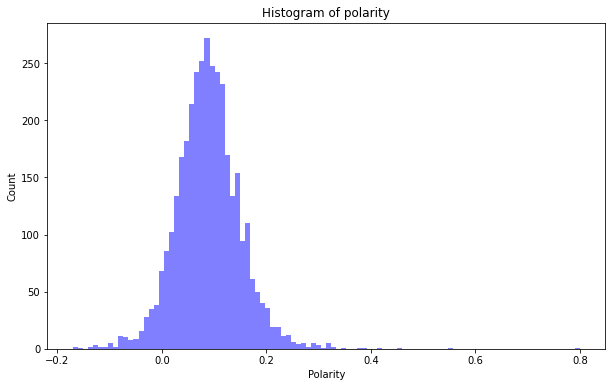

In [ ]:
num_bins = 100
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(data.text_Pol, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [ ]:
# Not needed


analyzer = SentimentIntensityAnalyzer()

data['compound'] = [analyzer.polarity_scores(v)['compound'] for v in data['text']]
data['neg'] = [analyzer.polarity_scores(v)['neg'] for v in data['text']]
data['neu'] = [analyzer.polarity_scores(v)['neu'] for v in data['text']]
data['pos'] = [analyzer.polarity_scores(v)['pos'] for v in data['text']]
data.head(3)


,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj,desc_Pol,desc_Subj,compound,neg,neu,pos
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,0.039794,0.373132,0.141667,0.325,-0.7584,0.068,0.896,0.036
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,0.076970,0.486854,0.000000,0.250,0.2991,0.045,0.912,0.043
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386,0.200000,0.200,0.9854,0.075,0.822,0.103


In [ ]:
data

,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj,desc_Pol,desc_Subj,compound,neg,neu,pos
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,0.039794,0.373132,0.141667,0.325000,-0.7584,0.068,0.896,0.036
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,0.076970,0.486854,0.000000,0.250000,0.2991,0.045,0.912,0.043
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386,0.200000,0.200000,0.9854,0.075,0.822,0.103
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...,0.146606,0.534071,0.500000,0.900000,0.9936,0.058,0.820,0.122
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...,0.111882,0.423282,0.500000,0.900000,0.9858,0.070,0.835,0.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,4604,['The Associated Press'],South Korea declares end to MERS virus outbreak,2015-12-23 09:07:00,South Korea on Wednesday declared a formal end...,South Korea on Wednesday declared a formal end...,https://www.cbc.ca/news/health/korea-mers-outb...,0.001082,0.311039,-0.200000,0.000000,-0.9395,0.130,0.836,0.034
3562,4605,['The Canadian Press'],MERS virus spread in hospitals should be focus...,2014-01-28 16:07:00,The spread of MERS coronavirus infections in h...,The spread of MERS coronavirus infections in h...,https://www.cbc.ca/news/health/mers-virus-spre...,0.113978,0.441041,0.375000,0.875000,-0.9908,0.108,0.835,0.057
3563,4606,['Cbc News'],Ellershausen Manor is for sale,2012-11-02 01:24:00,A clasic old home with a lot of history in now...,"It's a relic of a bygone era, when wealthy Nov...",https://www.cbc.ca/news/canada/nova-scotia/ell...,0.343750,0.775000,0.100000,0.200000,0.4118,0.000,0.910,0.090
3564,4607,['Cbc News'],MERS virus from camels and humans called indis...,2014-04-29 16:57:00,Camels have been implicated in a Middle Easter...,Camels have been implicated in a Middle Easter...,https://www.cbc.ca/news/health/mers-virus-from...,0.153408,0.393682,-0.087879,0.318182,0.9452,0.044,0.893,0.064


In [ ]:
def set_sentiment(row):
    if row["text_Pol"] > 0 :
        return "Positive"
    elif row["text_Pol"] == 0:
        return "Neutral"
    else:
        return "Negative"

data = data.assign(Sentiment=data.apply(set_sentiment, axis=1))

print(data)

      Unnamed: 0                   authors  ...    pos Sentiment
0              0              ['Cbc News']  ...  0.036  Positive
1              1              ['Cbc News']  ...  0.043  Positive
2              2  ['The Associated Press']  ...  0.103  Positive
3              3              ['Cbc News']  ...  0.122  Positive
4              4              ['Cbc News']  ...  0.095  Positive
...          ...                       ...  ...    ...       ...
3561        4604  ['The Associated Press']  ...  0.034  Positive
3562        4605    ['The Canadian Press']  ...  0.057  Positive
3563        4606              ['Cbc News']  ...  0.090  Positive
3564        4607              ['Cbc News']  ...  0.064  Positive
3565        4608    ['The Canadian Press']  ...  0.036  Positive

[3566 rows x 16 columns]


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj,desc_Pol,desc_Subj,compound,neg,neu,pos,Sentiment
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,0.039794,0.373132,0.141667,0.325,-0.7584,0.068,0.896,0.036,Positive
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,0.076970,0.486854,0.000000,0.250,0.2991,0.045,0.912,0.043,Positive
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386,0.200000,0.200,0.9854,0.075,0.822,0.103,Positive
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...,0.146606,0.534071,0.500000,0.900,0.9936,0.058,0.820,0.122,Positive
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...,0.111882,0.423282,0.500000,0.900,0.9858,0.070,0.835,0.095,Positive


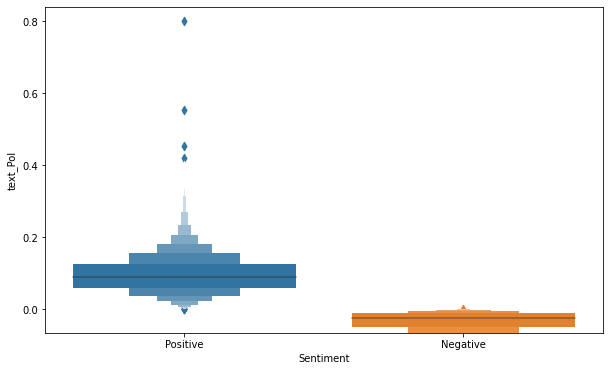

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Sentiment', y='text_Pol', data=data)
plt.show();

In [ ]:
data.publish_date = pd.to_datetime(data.publish_date)

In [ ]:
start_date = "2019-3-27"
end_date = "2020-03-28"

after_start_date = data["publish_date"] >= start_date
before_end_date = data["publish_date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = data.loc[between_two_dates]

In [ ]:
newsData = filtered_dates

In [ ]:
newsData

,Unnamed: 0,authors,title,publish_date,description,text,url,text_Pol,text_Subj,desc_Pol,desc_Subj,compound,neg,neu,pos,Sentiment
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,0.028848,0.467386,0.200000,0.200000,0.9854,0.075,0.822,0.103,Positive
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...,0.111882,0.423282,0.500000,0.900000,0.9858,0.070,0.835,0.095,Positive
7,7,['The Associated Press'],Michigan hospitals jammed as coronavirus cases...,2020-03-26 11:02:00,Michigan hospitals are bracing for a surge of ...,Michigan hospitals are bracing for a surge of ...,https://www.cbc.ca/news/canada/windsor/michiga...,0.111111,0.488889,-0.300000,0.400000,0.9186,0.040,0.839,0.121,Positive
8,8,['Thomson Reuters'],U.S. coronavirus cases now highest in the world,2020-03-26 14:55:00,The number of confirmed COVID-19 cases in the ...,The number of confirmed COVID-19 cases in the ...,https://www.cbc.ca/news/world/us-coronavirus-t...,0.093810,0.391295,0.343750,0.706250,-0.9170,0.066,0.871,0.063,Positive
10,10,"['Reporter', 'Web Writer For Cbc Saskatoon', '...",COVID-19 in Sask: Province announces first 3 c...,2020-03-26 14:18:00,The Saskatchewan government's latest update al...,Three Saskatchewan residents have recovered f...,https://www.cbc.ca/news/canada/saskatoon/saska...,0.148370,0.411406,0.212121,0.701515,0.9872,0.042,0.889,0.069,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,4589,['Cbc News'],Get informed on the top stories of the day in ...,2020-02-21 12:00:00,"In today's Morning Brief, we look at the outlo...",Good morning! This is our daily news roundup w...,https://www.cbc.ca/news/morning-brief-february...,0.115834,0.394351,-0.080000,0.776667,0.9610,0.084,0.817,0.099,Positive
3550,4592,['Wyatt James Schierman Is A Freelance Writer ...,Let's stop fixating on soft 'news' and pay att...,2020-02-02 09:00:00,Some of the 'big' Canadian stories of 2020 so ...,This column is an opinion by Wyatt James Schie...,https://www.cbc.ca/news/opinion/opinion-media-...,0.119826,0.547038,0.050000,0.550000,0.9943,0.065,0.825,0.110,Positive
3552,4595,['The Associated Press'],"Fed stands pat, keeps benchmark U.S. interest ...",2020-01-29 19:14:00,The Federal Reserve kept its benchmark interes...,The Federal Reserve kept its benchmark interes...,https://www.cbc.ca/news/business/federal-reser...,0.063022,0.406525,0.000000,0.350000,-0.7647,0.113,0.780,0.108,Positive
3553,4596,"['National Affairs Editor', ""Chris Hall Is The...","It's a new year, Mr. Trudeau. What do you want...",2020-01-29 09:00:00,If there's anything to be said about the Liber...,If there's anything to be said about the Liber...,https://www.cbc.ca/news/politics/trudeau-minor...,0.072065,0.399153,0.100000,0.455556,-0.9626,0.096,0.824,0.081,Positive


In [ ]:
data.publish_date = pd.to_datetime(data.publish_date)

In [ ]:
sums = data.set_index('publish_date').groupby(pd.Grouper(freq='D')).sum()

In [ ]:
means = data.set_index('publish_date').groupby(pd.Grouper(freq='D')).mean()

In [ ]:
means

,Unnamed: 0,text_Pol,text_Subj,desc_Pol,desc_Subj,compound,neg,neu,pos
publish_date,,,,,,,,,
2019-12-22,1473.000000,0.036765,0.167157,0.133333,0.191667,-0.984000,0.108000,0.885000,0.008000
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-03-22,2418.213483,0.121422,0.436278,0.060137,0.317495,0.639130,0.051427,0.859944,0.088461
2020-03-23,2212.421053,0.091449,0.406141,0.089284,0.339951,0.326855,0.057505,0.862021,0.080437
2020-03-24,1968.286458,0.090415,0.431800,0.082068,0.340529,0.375049,0.060411,0.855495,0.084104


In [ ]:
newsDF = means

In [ ]:
newsDF = newsDF.rename(columns={'publish_date': 'Date'})

In [ ]:
newsDF

,Unnamed: 0,text_Pol,text_Subj,desc_Pol,desc_Subj,compound,neg,neu,pos
publish_date,,,,,,,,,
2019-12-22,1473.000000,0.036765,0.167157,0.133333,0.191667,-0.984000,0.108000,0.885000,0.008000
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-03-22,2418.213483,0.121422,0.436278,0.060137,0.317495,0.639130,0.051427,0.859944,0.088461
2020-03-23,2212.421053,0.091449,0.406141,0.089284,0.339951,0.326855,0.057505,0.862021,0.080437
2020-03-24,1968.286458,0.090415,0.431800,0.082068,0.340529,0.375049,0.060411,0.855495,0.084104


###Financial Stuff

In [ ]:
djia = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unstructured Project/Team-Grays-Peak-master 2/DowJones.csv')
djia.head()
pd.to_datetime(djia.Date)
djia['Change'] = (djia.Close - djia.Open) / djia.Open

In [ ]:
ndq = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unstructured Project/Team-Grays-Peak-master 2/Nasdaq.csv')
ndq.head()
pd.to_datetime(ndq.Date)
ndq['Change'] = (ndq.Close - ndq.Open) / ndq.Open

In [ ]:
sp500 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unstructured Project/Team-Grays-Peak-master 2/SP500.csv')
sp500.head()
pd.to_datetime(sp500.Date)
sp500['Change'] = (sp500.Close - sp500.Open) / sp500.Open

In [ ]:
bitcoin = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unstructured Project/Team-Grays-Peak-master 2/Bitcoin.csv')
bitcoin.head()
pd.to_datetime(bitcoin.Date)

start_date = "2020-02-06"
end_date = "2020-03-27"

after_start_date = bitcoin["Date"] >= start_date
before_end_date = bitcoin["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
bitcoin = bitcoin.loc[between_two_dates]
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
86,2020-02-06,9617.821289,9824.619141,9539.818359,9729.801758,9729.801758,3.762882e+10
87,2020-02-07,9726.002930,9834.716797,9726.002930,9795.943359,9795.943359,3.452272e+10
88,2020-02-08,9793.070313,9876.749023,9678.910156,9865.119141,9865.119141,3.517204e+10
89,2020-02-09,9863.894531,10129.435547,9850.392578,10116.673828,10116.673828,3.580788e+10
90,2020-02-10,10115.559570,10165.765625,9784.563477,9856.611328,9856.611328,3.938655e+10


In [ ]:
bitcoin['Change'] = (bitcoin.Close - bitcoin.Open) / bitcoin.Open

In [ ]:
bitcoin.index = 

,Date,Open,High,Low,Close,Adj Close,Volume,Change
86,2020-02-06,9617.821289,9824.619141,9539.818359,9729.801758,9729.801758,3.762882e+10,0.011643
87,2020-02-07,9726.002930,9834.716797,9726.002930,9795.943359,9795.943359,3.452272e+10,0.007191
88,2020-02-08,9793.070313,9876.749023,9678.910156,9865.119141,9865.119141,3.517204e+10,0.007357
89,2020-02-09,9863.894531,10129.435547,9850.392578,10116.673828,10116.673828,3.580788e+10,0.025627
90,2020-02-10,10115.559570,10165.765625,9784.563477,9856.611328,9856.611328,3.938655e+10,-0.025599
91,2020-02-11,9855.891602,10210.052734,9729.334961,10208.236328,10208.236328,3.764806e+10,0.035750
92,2020-02-12,10202.387695,10393.611328,10202.387695,10326.054688,10326.054688,4.344430e+10,0.012121
93,2020-02-13,10323.960938,10457.626953,10116.161133,10214.379883,10214.379883,4.935607e+10,-0.010614
94,2020-02-14,10211.550781,10321.996094,10125.534180,10312.116211,10312.116211,4.333826e+10,0.009848
95,2020-02-15,10313.856445,10341.555664,9874.427734,9889.424805,9889.424805,4.386505e+10,-0.041152


In [ ]:
stocksDF = pd.DataFrame()

In [ ]:
#after loading in all markets take the pct change for each day, change the names, and then add them to a DF
stocksDF['bitcoin'] = bitcoin['Change']
stocksDF['djia']= djia['Change']
stocksDF['sap']= sp500['Change']
stocksDF['ndq'] = ndq['Change']
stocksDF.index = bitcoin['Date']

In [ ]:
stocksDF

,bitcoin,djia,sap,ndq
Date,,,,
2020-02-06,0.011643,-0.007742,-0.008843,-0.002030
2020-02-07,0.007191,0.003505,0.003226,0.004398
2020-02-08,0.007357,0.001175,0.002339,0.004283
2020-02-09,0.025627,inf,0.002373,0.004283
2020-02-10,-0.025599,0.006668,0.017621,0.012546
2020-02-11,0.035750,-0.003539,-0.003867,-0.004445
2020-02-12,0.012121,0.002751,0.002962,0.002921
2020-02-13,-0.010614,0.001634,0.001753,0.000844
2020-02-14,0.009848,-0.003175,-0.002893,-0.003256


In [ ]:
stocksDF.index = stocksDF.Date

###MERGING NEWS AND STOCK DATA

In [ ]:
mergedDF = pd.merge(stocksDF, newsDF, left_index=True, right_index=True )

In [ ]:
import csv

In [ ]:
mergedDF.to_csv('/content/drive/My Drive/Colab Notebooks/Unstr/Team-Grays-Peak-master 3/mergedDF.csv')

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
adf_test(prophetdata['y'])

Results of Dickey-Fuller Test:
Test Statistic                -8.753704e+00
p-value                        2.791957e-14
#Lags Used                     0.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (1%)           -3.571472e+00
Critical Value (5%)           -2.922629e+00
Critical Value (10%)          -2.599336e+00
dtype: float64


In [ ]:
#---  creating allmedia media prophet dataframe
prophetdata = pd.DataFrame()
prophetdata['y'] = mergedDF['bitcoin']
prophetdata['ds'] = mergedDF.index

#--- pulling sponsored data out and extracting out days were there isn't 0's as changepoint
# #---- creating prohpet model
model = Prophet()
model.add_country_holidays(country_name = 'US')
model.fit(prophetdata)
future = model.make_future_dataframe(periods=15, freq='D')
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
60,2020-04-06
61,2020-04-07
62,2020-04-08
63,2020-04-09
64,2020-04-10


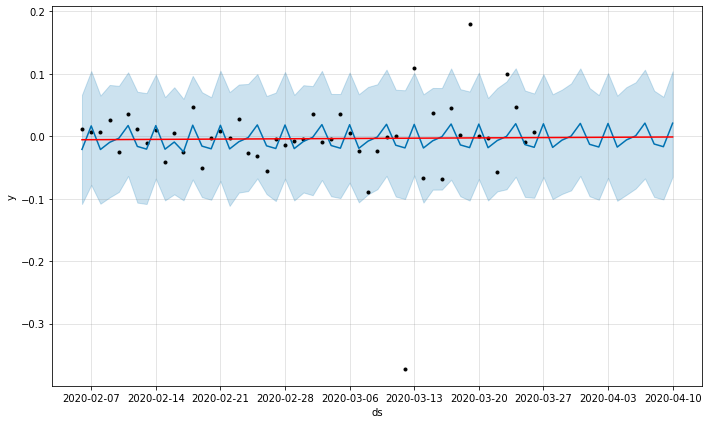

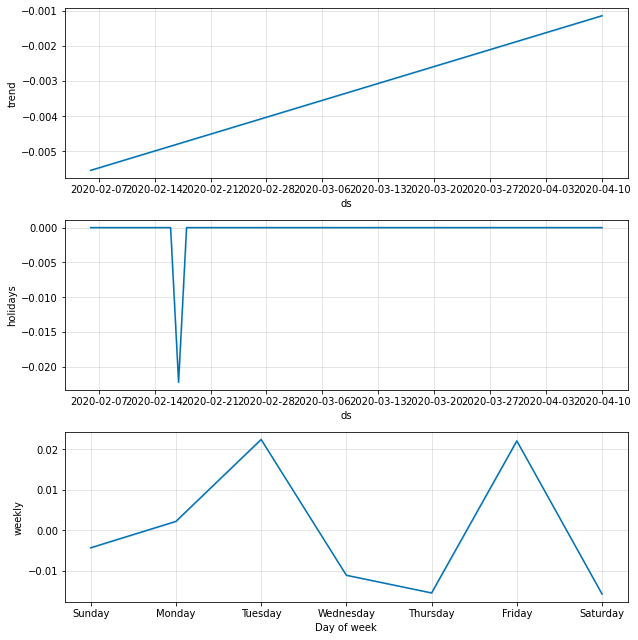

In [ ]:
forecast = model.predict(future)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)
a = add_changepoints_to_plot(fig1.gca(),model,forecast)

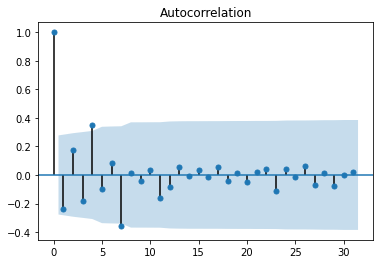

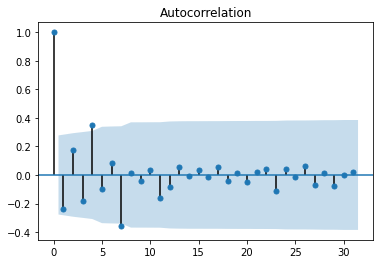

In [ ]:
plot_acf(prophetdata['y'],lags = 31)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



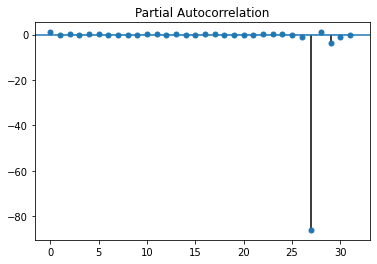

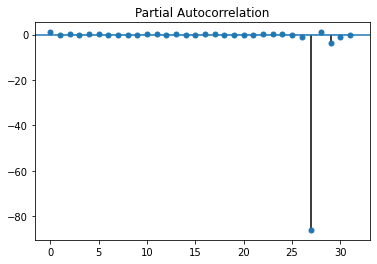

In [ ]:
plot_pacf(prophetdata['y'],lags = 31)

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
del mergedDF['Unnamed: 0']

In [ ]:
mergedDF

In [ ]:

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
model = ARIMA(mergedDF['bitcoin'] ,order=(1,1,1))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.bitcoin   No. Observations:                   49
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  60.288
Method:                       css-mle   S.D. of innovations              0.068
Date:                Tue, 28 Apr 2020   AIC                           -112.575
Time:                        20:39:46   BIC                           -105.008
Sample:                    02-07-2020   HQIC                          -109.704
                         - 03-26-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.676e-05      0.001      0.158      0.875      -0.001       0.001
ar.L1.D.bitcoin    -0.2201      0.138     -1.592      0.118      -0.491       0.051
ma.L1.D.bitcoin    -1.0000      

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



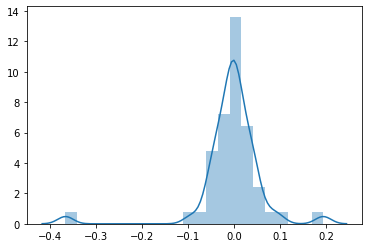

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
sns.distplot(residuals, hist = True, kde = True)

In [ ]:
#---  creating allmedia media prophet dataframe
prophetdata = pd.DataFrame()
prophetdata['y'] = mergedDF['sap']
prophetdata['ds'] = mergedDF.index

#--- pulling sponsored data out and extracting out days were there isn't 0's as changepoint
# #---- creating prohpet model
model = Prophet()
model.add_country_holidays(country_name = 'US')
model.fit(prophetdata)
future = model.make_future_dataframe(periods=15, freq='D')
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
60,2020-04-06
61,2020-04-07
62,2020-04-08
63,2020-04-09
64,2020-04-10


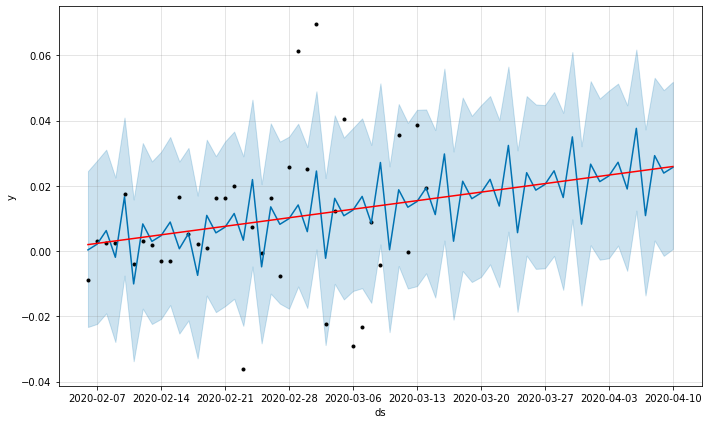

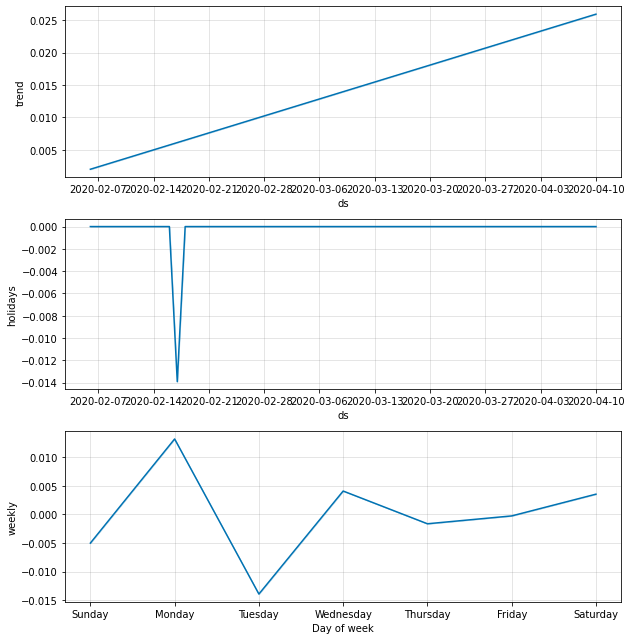

In [ ]:
forecast = model.predict(future)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)
a = add_changepoints_to_plot(fig1.gca(),model,forecast)